# K-Means Approach to analyze reduce data set from _communities.data_

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

## Reading data

In [22]:
DATA = pd.read_csv("DataFrame_Reducido.csv", index_col="Unnamed: 0")
DATA

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.0,0.44,0.64,0.21,0.19


## Finding optimal number of cluster for K-Means

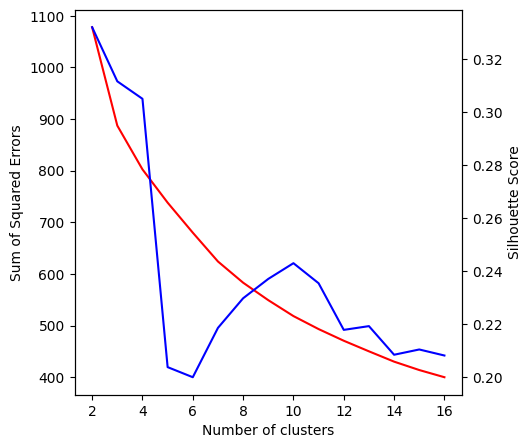

In [23]:
Rango_Clusters = range(2, 17)
N = len(Rango_Clusters)
SSE = N*[0.0]
SILS = N*[0.0]
for index, n in enumerate(Rango_Clusters):
    K_Means = KMeans(n_clusters = n, init = "k-means++", n_init = 20, random_state = 21)
    K_Means.fit(DATA)
    Labels = K_Means.labels_

    SSE[index] = K_Means.inertia_
    SILS[index] = silhouette_score(DATA, Labels, metric="euclidean")

Figura, Sub1 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
Sub2 = Sub1.twinx()

Sub1.plot(Rango_Clusters, SSE, "-r")
Sub1.set_xlabel("Number of clusters")
Sub1.set_ylabel("Sum of Squared Errors")

Sub2.plot(Rango_Clusters, SILS, "-b")
Sub2.set_ylabel("Silhouette Score")

plt.show()

By identifying the max value of the Silhouette scoures, we can observer that with 3 clusters we maximize this quantity. For this, we will pick this as the optimal number of clusters.

## Using optimal number of clusters

In [24]:
N_Clusters = 3
K_Means = KMeans(n_clusters = N_Clusters, init = "random", n_init = 20, random_state = 42)
K_Means.fit(DATA)

DATA["Cluster_Label"] = K_Means.predict(DATA)
DATA.Cluster_Label.value_counts()

1    1033
2     573
0     388
Name: Cluster_Label, dtype: int64

## Observing variables by K-Means clustering

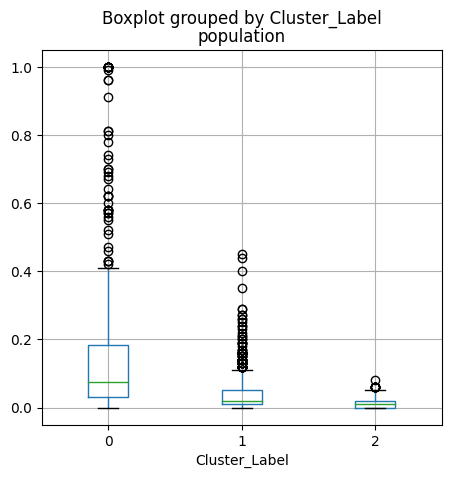

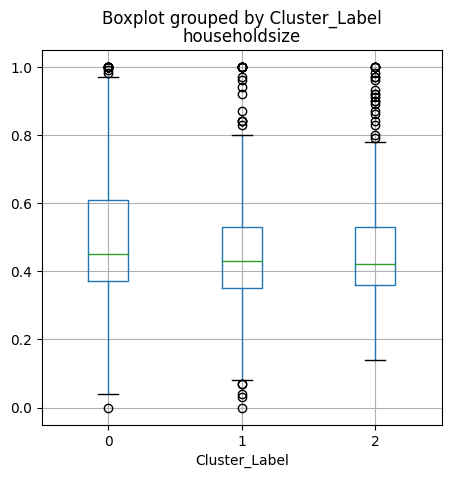

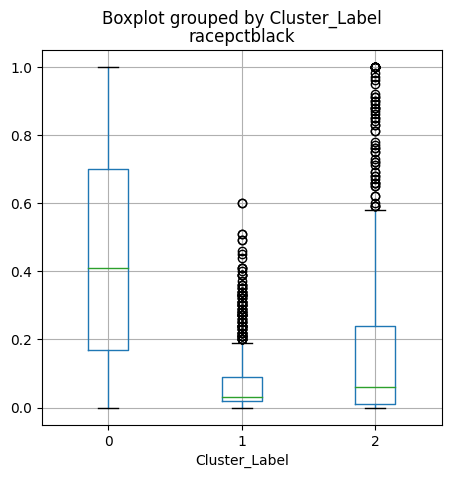

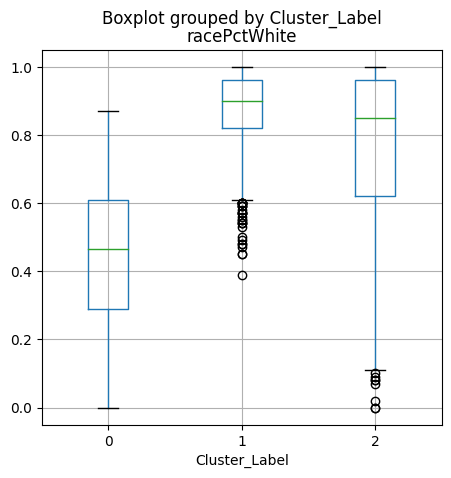

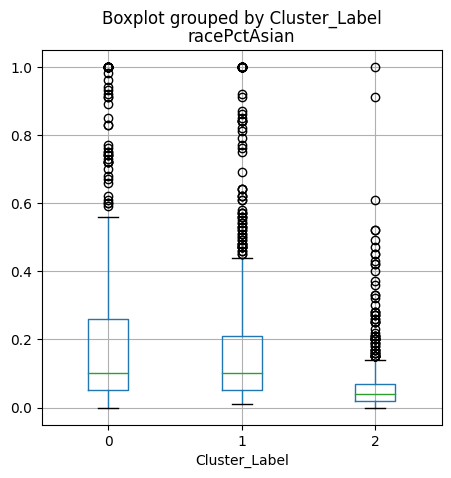

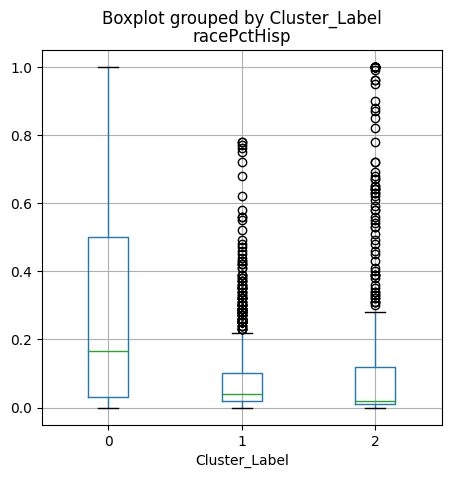

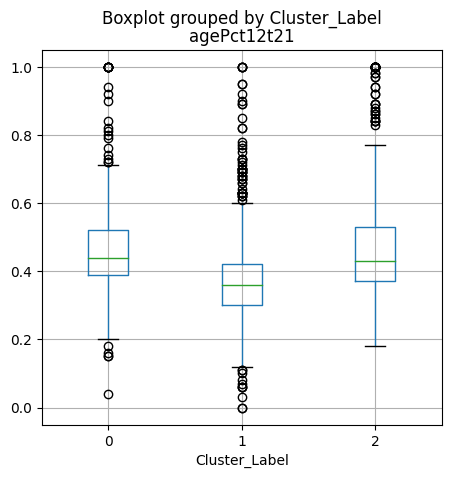

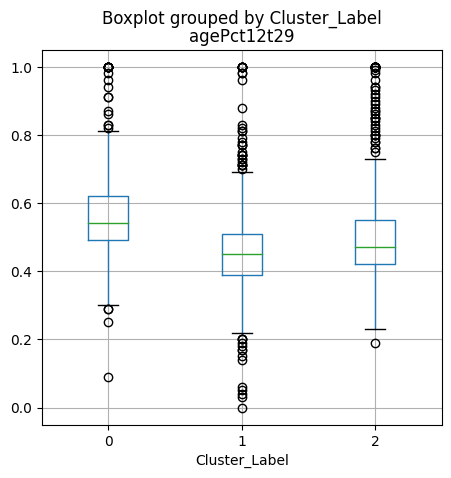

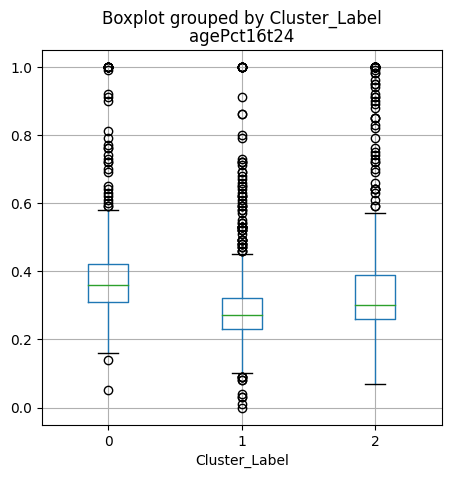

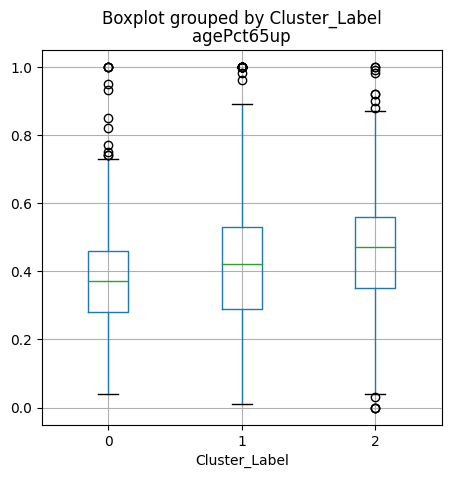

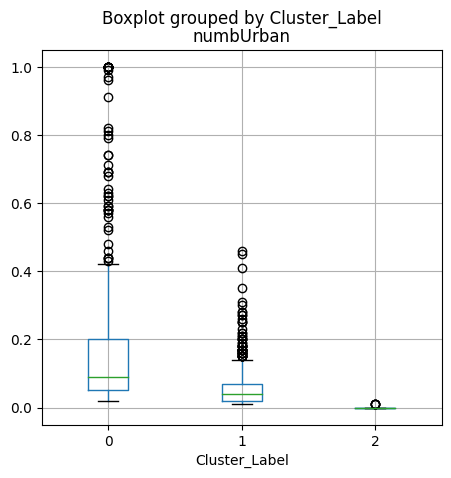

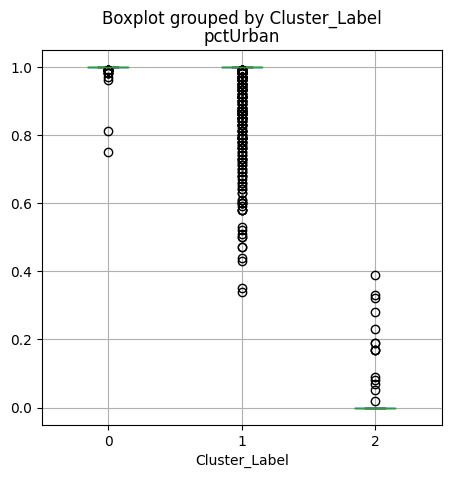

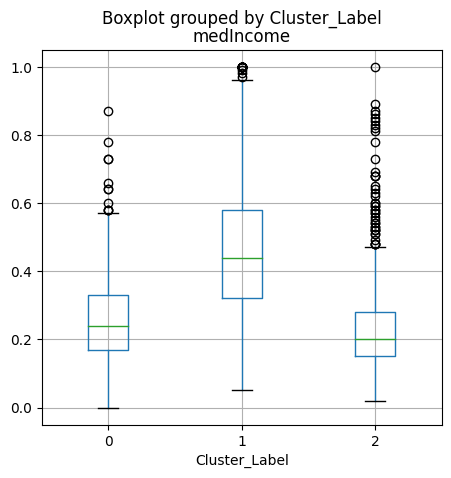

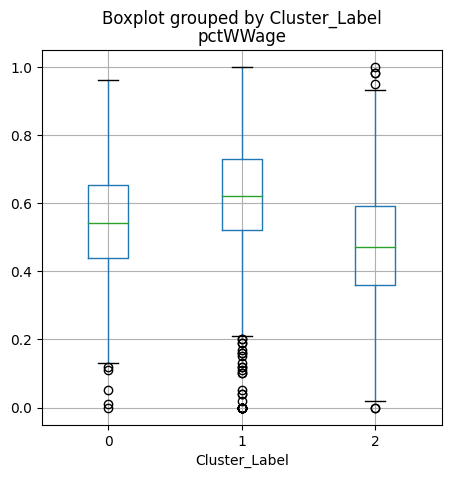

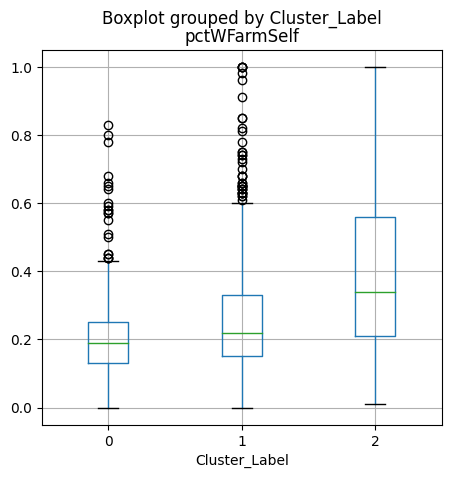

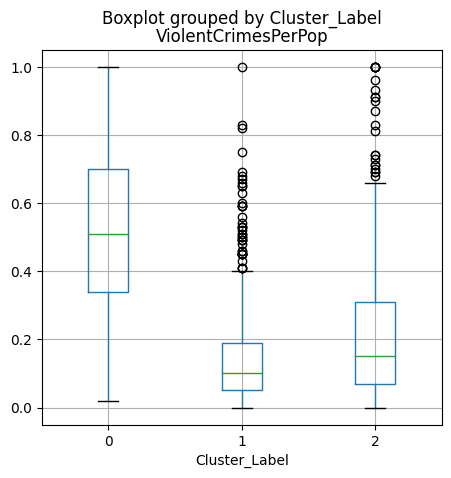

In [25]:
for column in DATA.columns[:-1]:
    DATA.boxplot(column = column, by = "Cluster_Label", figsize = (5,5))
    plt.show()

Now let's visualize scatter plots respect to _ViolentCrimesPerPop_ given the clusters' labels.

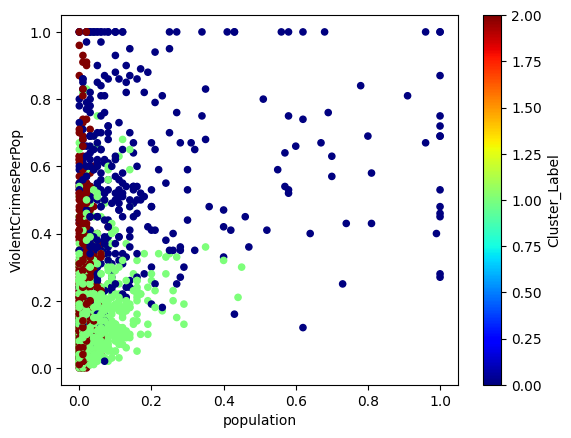

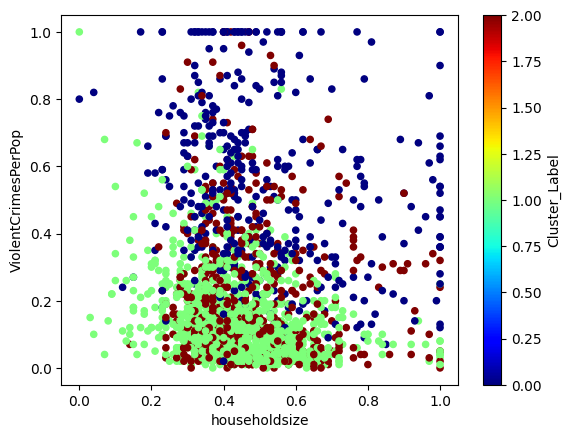

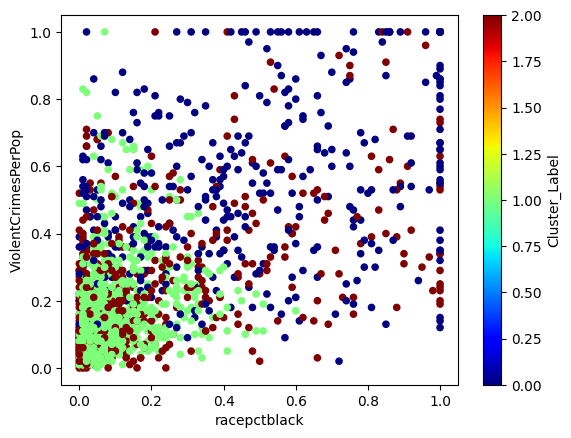

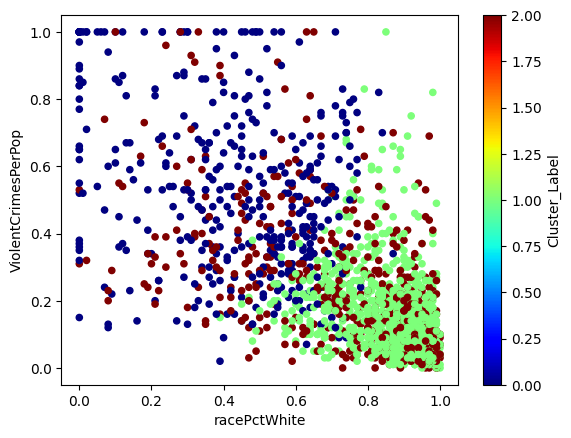

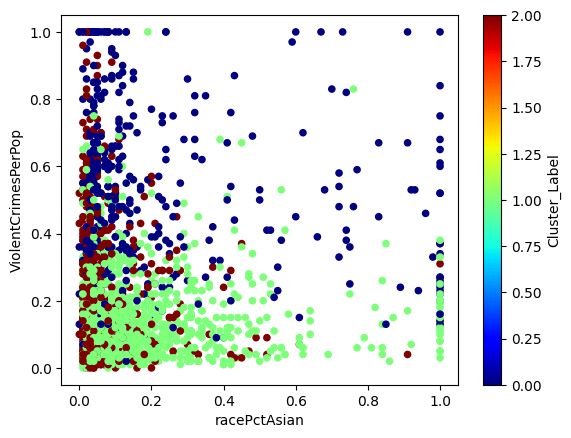

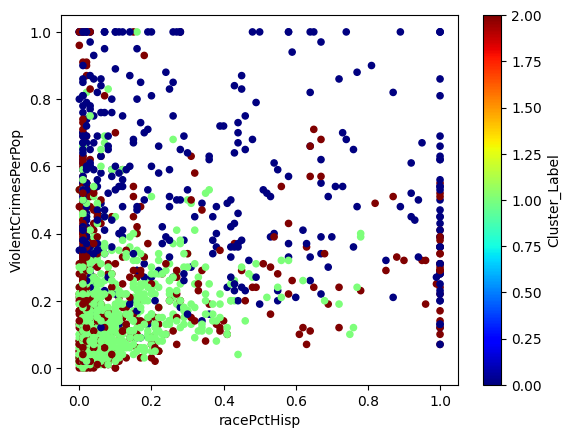

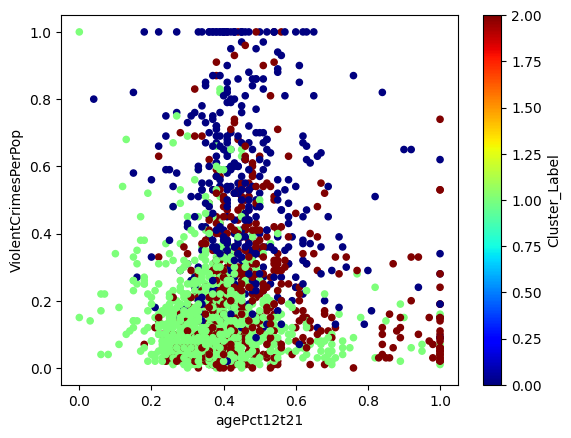

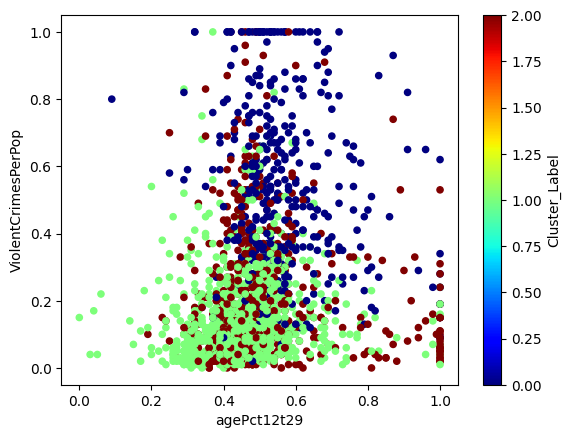

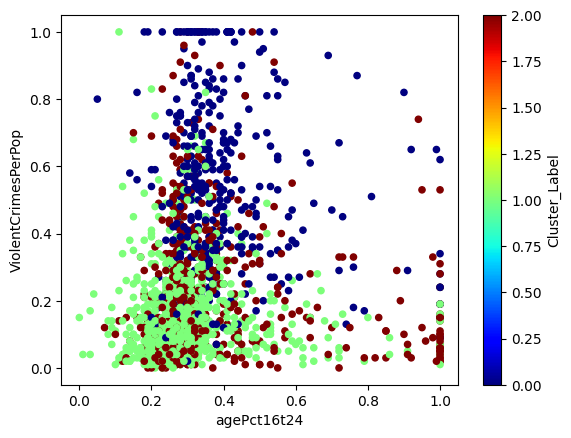

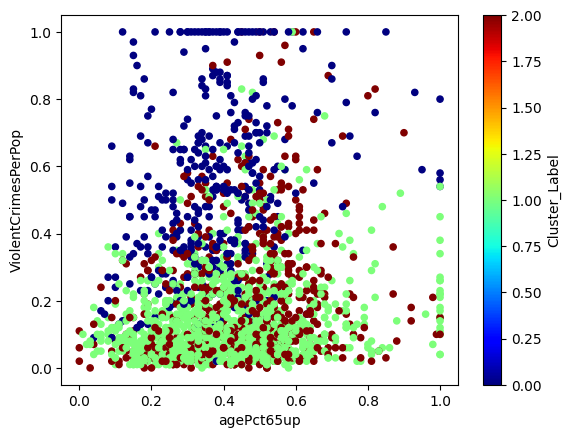

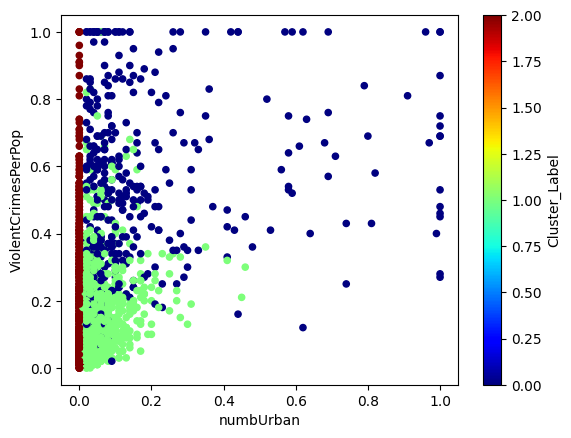

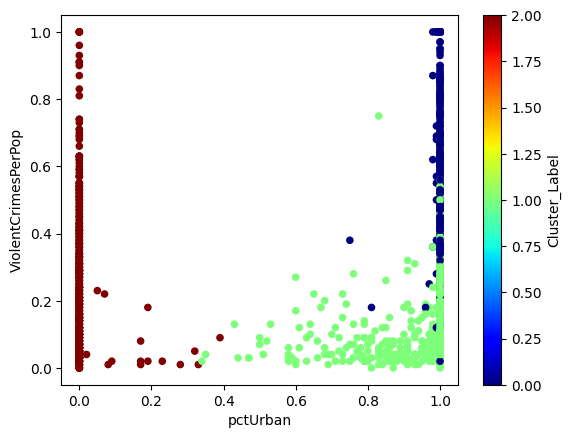

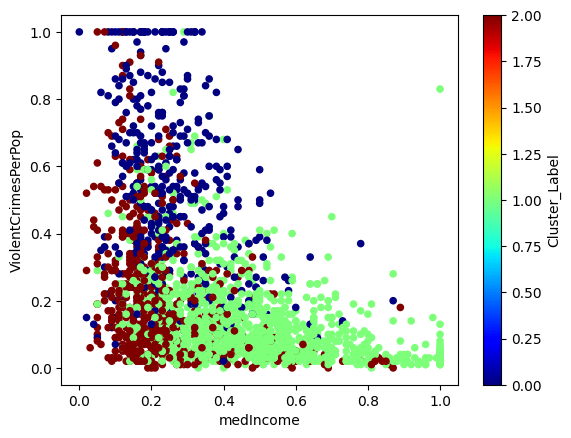

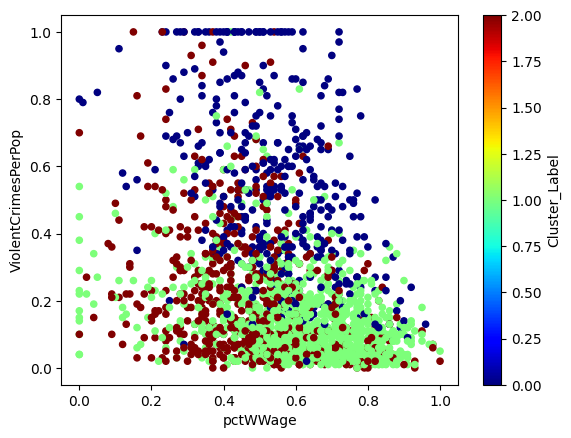

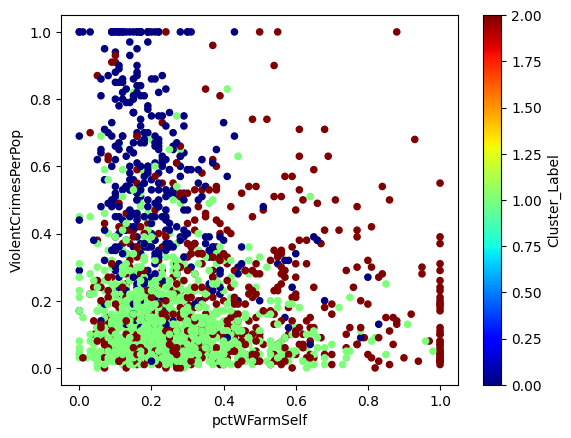

In [26]:
for column in tuple(DATA.columns)[:-2]:
    DATA.plot.scatter(x=column, y="ViolentCrimesPerPop", c="Cluster_Label", cmap="jet")